In [29]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill: ast.literal_eval(skill)if pd.notna(skill)else skill)

In [30]:
df_Us=df[df['job_country']=="United States"]

In [31]:
df_skills= df_Us.explode('job_skills')
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [32]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count=df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [33]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

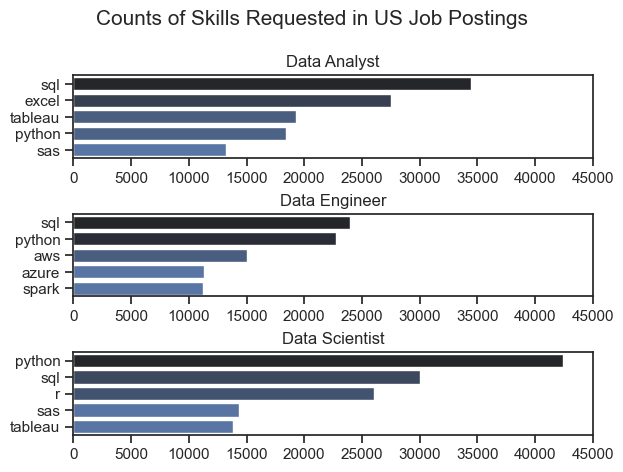

In [34]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
     df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
     sns.barplot(data=df_plot,x='skill_count',y='job_skills',ax=ax[i],hue='skill_count',palette="dark:b_r")
     ax[i].set_title(job_title)
     ax[i].set_ylabel('')
     ax[i].set_xlabel('')
     ax[i].get_legend().remove()
     ax[i].set_xlim(0, 45000) 
fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()




In [35]:
df_job_title_count=df_Us['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [36]:
df_skills_perc =pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skills_perc['skill_perc']=100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


In [37]:
type(df_skills_perc)

pandas.core.frame.DataFrame

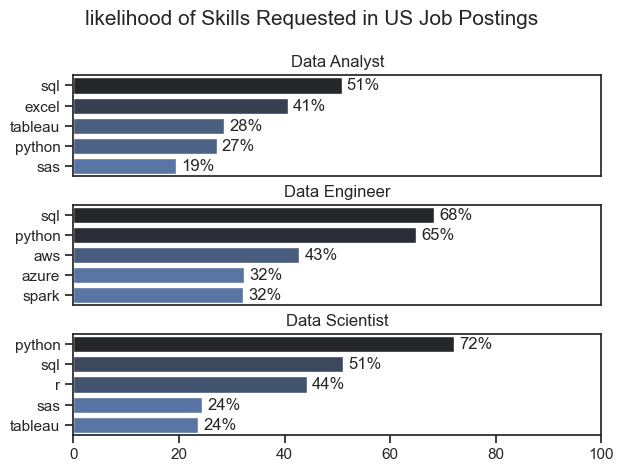

In [41]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
     df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
     sns.barplot(data=df_plot,x='skill_perc',y='job_skills',ax=ax[i],hue='skill_count',palette="dark:b_r")
     ax[i].set_title(job_title)
     ax[i].set_ylabel('')
     ax[i].set_xlabel('')
     ax[i].get_legend().remove()
     ax[i].set_xlim(0,100) 
     if i != len(job_titles) - 1:
        ax[i].set_xticks([])
     for n,v in enumerate(df_plot['skill_perc']):
          ax[i].text(v+1,n,f'{v:.0f}%',va='center') 

fig.suptitle('likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) 
plt.show()
